Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Melhores parâmetros: {'solver': 'lbfgs', 'C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 66.74%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       535
           1       0.45      0.61      0.51       547
           2       0.72      0.60      0.65       576
           3       0.80      0.82      0.81       560
           4       0.58      0.62      0.60       534
           5       0.64      0.63      0.63       563
           6       0.82      0.78      0.80       586
           7       0.86      0.90      0.88       518
           8       0.70      0.68      0.69       552
           9       0.60      0.76      0.67       561
          10       0.67      0.70      0.69       549
          11       0.72      0.66      0.69       565
          12       0.76      0.77      0.77       565
          13       0.70      0.70      0.70       556
          14       0.74      0.70      0.72       540
          15       0.48      0.37      0.42       529
          16       0.75      0.73  

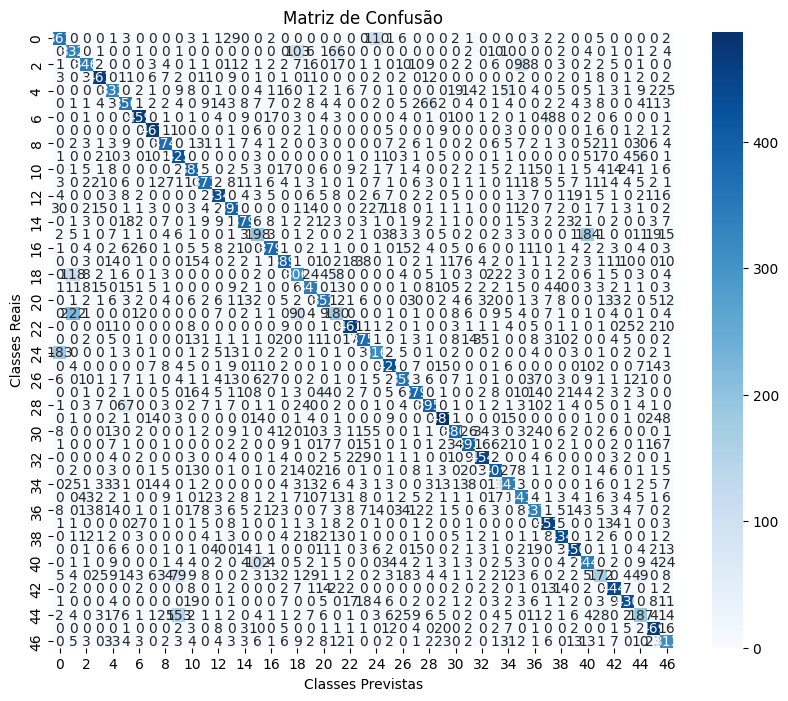

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Carregando o dataset EMNIST 'Balanced', que inclui dígitos e letras
emnist = fetch_openml('emnist_balanced', version=1)
X, y = emnist.data, emnist.target

# Convertendo os labels para inteiros
y = y.astype(int)

# Dividindo o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduzindo a dimensionalidade com PCA para acelerar o processo de treinamento
pca = PCA(n_components=50)  # 50 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Subamostragem para otimização rápida de hiperparâmetros
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_pca, y_train, test_size=0.9, random_state=42)

# Grid de parâmetros ajustado para LogisticRegression
param_grid = {
    'C': [0.1, 1, 10],         # Valores de regularização
    'solver': ['lbfgs', 'saga'] # Solvers compatíveis com regressão multinomial
}

# Criando o modelo de Regressão Logística Multiclasse
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=200)

# Utilizando o RandomizedSearchCV para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(
    logistic_model,
    param_distributions=param_grid,
    n_iter=4,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_sample, y_train_sample)

# Verificando os melhores parâmetros encontrados
print("Melhores parâmetros:", random_search.best_params_)

# Modelo otimizado
best_logistic = random_search.best_estimator_
best_logistic.fit(X_train_pca, y_train)

# Fazendo previsões no conjunto de teste
y_pred = best_logistic.predict(X_test_pca)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

# Relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Reais")
plt.show()
